# Diskretisierung eines Systems

In diesem Kurs haben wir gesehen, dass kontinuierliche Systeme diskretisiert werden können. Diese Methode ist nützlich, wenn wir Systeme auf einem Computer simulieren oder digitale Regler entwerfen wollen. Es gibt eine große Quantität von Diskretisierungsmethoden. In diesem Abschnitt konzentrieren wir uns auf zwei einfache, aber wichtige Beispiele: die Vorwärts-Euler-Methode und die Rückwärts-Euler-Methode.

## Vorwärts-Euler

Diese ist eine explizite Methode zur Approximation der Ableitung eines Signals. Mann verwendet die Steigung an der aktuellen Zeitstelle, um den nächsten Wert zu berechnen. Die formale Definition ist es gegeben als:

$$\dot{y}[k] \approx \frac{y[k+1] - y[k]}{\Delta t}$$

wo den $\Delta t$ beschreibt die Schrittweite. Wir können die letzte Gleichung umschreiben als:

$$y[k+1] = y[k] + \Delta t \cdot \dot{y}[k]$$

## Rückwärts-Euler

Diese zweite Methode  ist eine implizite Methode und es beschriebt die Annäherung, wo die Steigung am zukünftigen Zeitpunkt verwendet:

$$\dot{y}[k+1] \approx \frac{y[k+1] - y[k]}{\Delta t}$$

umgeschrieben als:

$$y[k+1] = y[k] + \Delta t \cdot \dot{y}[k+1]$$

Da $\dot{y}[k+1]$ im Allgemeinen nicht direkt bekannt ist, führt diese Methode oft zu Gleichungen, die gelöst werden müssen. Und diese Methode ist numerisch stabiler als die Vorwärts-Euler-Methode. 


### Beispiel 1

Als eine Beispiel, analysieren wir die Gleichung $y(t) = \sin(t)$, wir analysieren die Annäherung in Zeitpunkt $t_{init} = 1$ s mit eine $\Delta t = 0.5$ s für Vorwärts- und Rückwärts-Metoden:

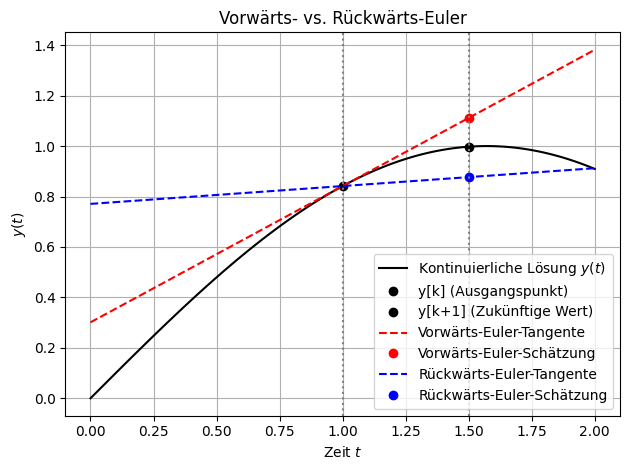

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector and function
t = np.linspace(0, 2, 100)
y = np.sin(t)

# Parameters
dt = 0.5
t_k = 1.0
y_k = np.sin(t_k)
y_dot = np.cos(t_k) # derivative of y

# Forward Euler estimate (first definition)
y_forward = y_k + dt * y_dot

# Backward Euler estimate (second definition)
t_future = t_k + dt
y_t_future = np.sin(t_future)
y_dot_t_future = np.cos(t_future) # derivative at t_future
y_backward = y_k + dt * y_dot_t_future

# Tangent for both estimates (slopes)
y_forward_line = y_k + y_dot * (t - t_k)
y_backward_line = y_k + y_dot_t_future * (t - t_k)

# Plot the results
plt.plot(t, y, 'k-', label='Kontinuierliche Lösung $y(t)$')
plt.plot([t_k], [y_k], 'ko', label='y[k] (Ausgangspunkt)')
plt.plot([t_k + dt], [y_t_future], 'ko', label='y[k+1] (Zukünftige Wert)')
plt.plot(t, y_forward_line, 'r--', label='Vorwärts-Euler-Tangente') # tangent for forward Euler
plt.plot([t_k + dt], [y_forward], 'ro', label='Vorwärts-Euler-Schätzung')
plt.plot(t, y_backward_line, 'b--', label='Rückwärts-Euler-Tangente') # tangent for backward Euler
plt.plot([t_k + dt], [y_backward], 'bo', label='Rückwärts-Euler-Schätzung')

# Extra annotations
plt.axvline(t_k, color='gray', linestyle=':')
plt.axvline(t_k + dt, color='gray', linestyle=':')
plt.xlabel('Zeit $t$')
plt.ylabel('$y(t)$')
plt.title('Vorwärts- vs. Rückwärts-Euler')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Aufgabe 4 c): Stabilität bei Diskretisierung durch Euler-Vorwärts und Euler-Rückwärts Approximation

Diese Aufgabe befindet sich in dem Übungsblatt 12, in dieser Übung haben wir gesehen, dass der s-Bereich hat seine Äquivalenz im z-Bereich hat, wenn man die Vorwärts- und Rückwärts-Euler Methoden verwendet. 

Für die Vorwärts-Euler Methode gilt es:

$$s = \frac{z - 1}{\Delta t}$$ 

Für die Rückwärts-Euler Methode gilt es:

$$s = \frac{z - 1}{\Delta t \cdot z}$$

für Rückwärts-Euler. 

Die Aufgabe fragt uns dann:

> (c) Diskretisieren Sie das nachfolgend angegebene System mittels der Euler-Vorwärts und Euler-Rückwärts Approximation. Vergleichen Sie die Sprungantworten des zeitkontinuierlichen Systems mit denen des zeitdiskreten für verschiedene Abstastzeiten.

Das gegebene System lautet:

$$G(s) = \frac{\frac{1}{s^2}}{s^2 + 2 + \frac{5}{s^2}} = \frac{1}{s^4 + 2s^{2} + 5}$$

Dann, man kann $s$ mit $s = \frac{z - 1}{\Delta t}$ und $s = \frac{z - 1}{\Delta t z}$ umschreiben, und für mehrere Zeitpünkte es zu berechnen. Es ist trotz, einfach es in Python zu programmieren um die Unteerschieden zwischen beide Methoden zu analysieren.

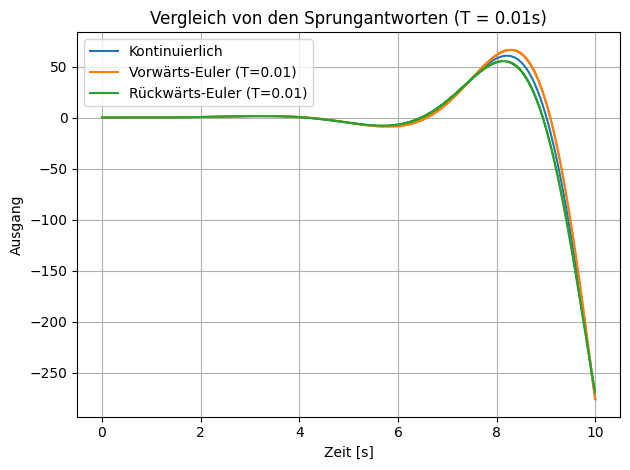

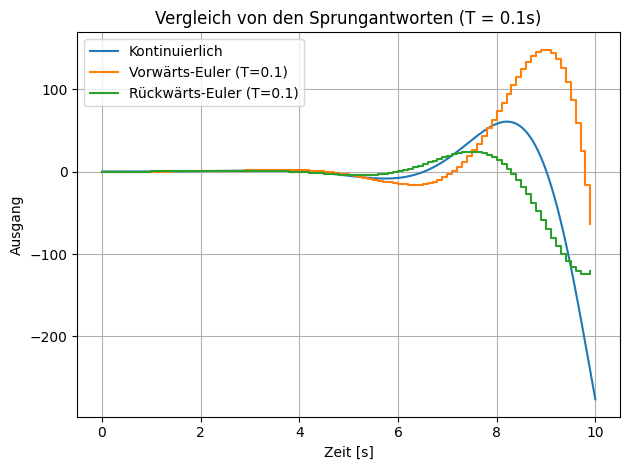

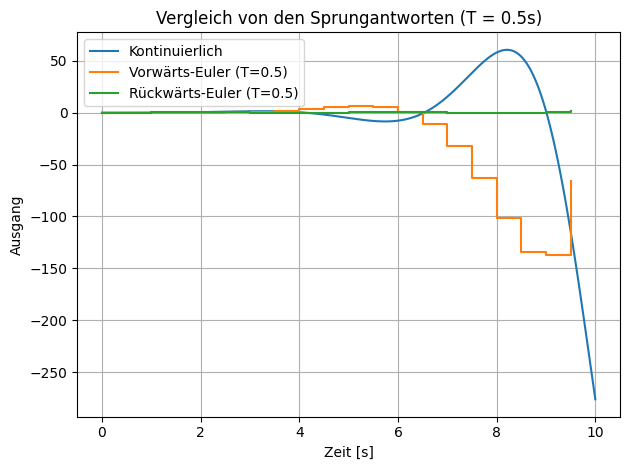

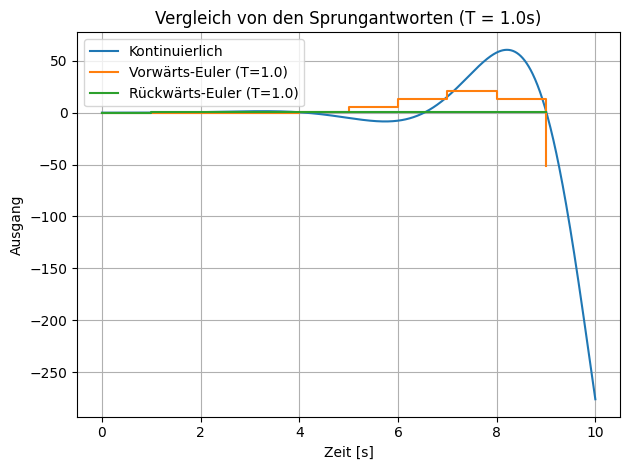

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Continuous-time system
numerator = [1]
denominator = [1, 0, 2, 0, 5]
system_continous = ctrl.tf(numerator, denominator)

# Time vector for continuous system
t_continous = np.linspace(0, 10, 1000)
t_continous, y_continous = ctrl.step_response(system_continous, t_continous)

# Discretization time steps
Ts_list = [0.01, 0.1, 0.5, 1.0]

for Ts in Ts_list:
    # Discretize system using Forward Euler and Backward Euler methods
    system_forward = ctrl.sample_system(system_continous, Ts, method='forward_diff')
    system_backward = ctrl.sample_system(system_continous, Ts, method='backward_diff')

    # Time vector for discrete systems
    n_steps = int(10 / Ts)
    t_disc = np.linspace(0, n_steps * Ts, n_steps, endpoint=False)

    # Test with step response
    t_forward, y_forward = ctrl.step_response(system_forward, t_disc)
    t_backward, y_backward = ctrl.step_response(system_backward, t_disc)

    # Plotting
    plt.figure()
    plt.plot(t_continous, y_continous, label='Kontinuierlich')
    plt.step(t_forward, y_forward, where='post', label=f'Vorwärts-Euler (T={Ts})')
    plt.step(t_backward, y_backward, where='post', label=f'Rückwärts-Euler (T={Ts})')
    plt.xlabel('Zeit [s]')
    plt.ylabel('Ausgang')
    plt.title(f"Vergleich von den Sprungantworten (T = {Ts}s)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
